# 01 - Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Option A: load CSV if you already saved it to data/
try:
    df = pd.read_csv("../data/heart_disease.csv")
except FileNotFoundError:
    # Option B: fetch from UCI and save to data/ (run once)
    heart = fetch_ucirepo(id=45)
    X = heart.data.features
    y = heart.data.targets
    df = X.copy()
    df['target'] = y
    df.to_csv("../data/heart_disease.csv", index=False)



In [2]:
df.shape, df.head()
df.info()
print("Missing value counts:\n", df.isna().sum())
# class distribution
print("Class distribution in the dataset:")
print(df['target'].value_counts().sort_index())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
Missing value counts:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0


In [3]:
# Replace '?' with NaN and coerce numeric columns
df.replace('?', np.nan, inplace=True)

# Force numeric conversion for columns that should be numeric
for col in df.columns:
    if col not in ['cp', 'slope', 'thal', 'target']:   # keep categorical untouched for now
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("Missing values before removing rows:")
print(df.isna().sum())

# Remove rows with any NaN values instead of filling with mode
df = df.dropna()

print("\nAfter removing rows with NaN values:")
print(df.isna().sum())
print(f"\nDataFrame shape after removing NaN rows: {df.shape}")


Missing values before removing rows:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

After removing rows with NaN values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

DataFrame shape after removing NaN rows: (297, 14)


In [4]:
numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_cols = ["cp", "slope", "thal", "ca"]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# Save cleaned csv for next notebooks
df.to_csv("../data/heart_disease_clean.csv", index=False)
print("Saved cleaned data to ../data/heart_disease_clean.csv")


Saved cleaned data to ../data/heart_disease_clean.csv


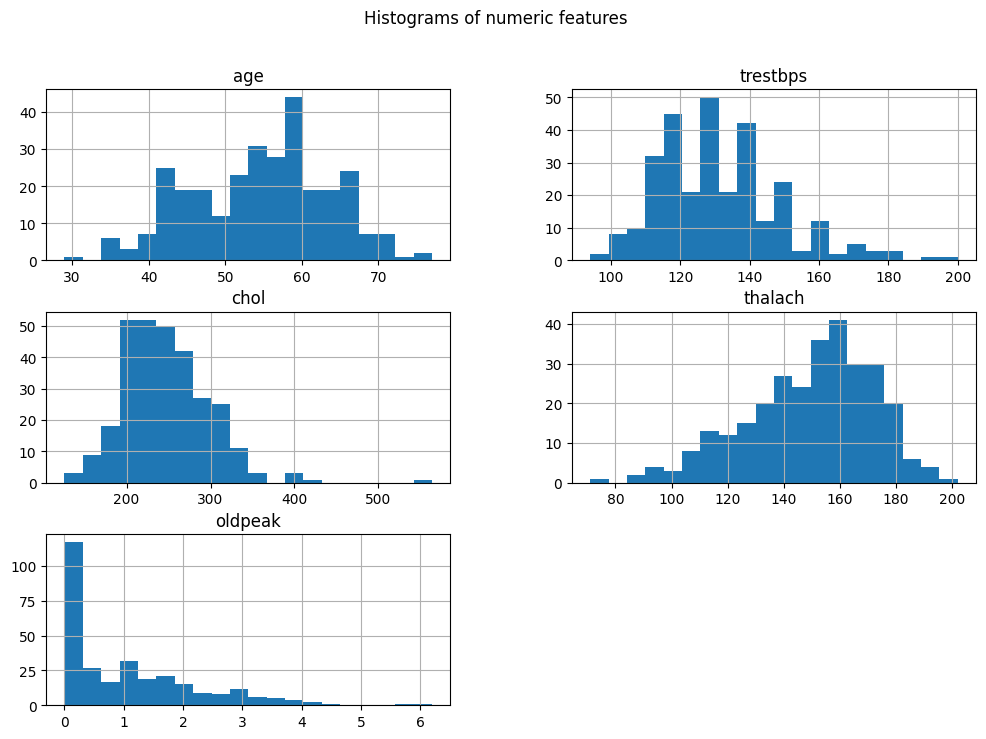

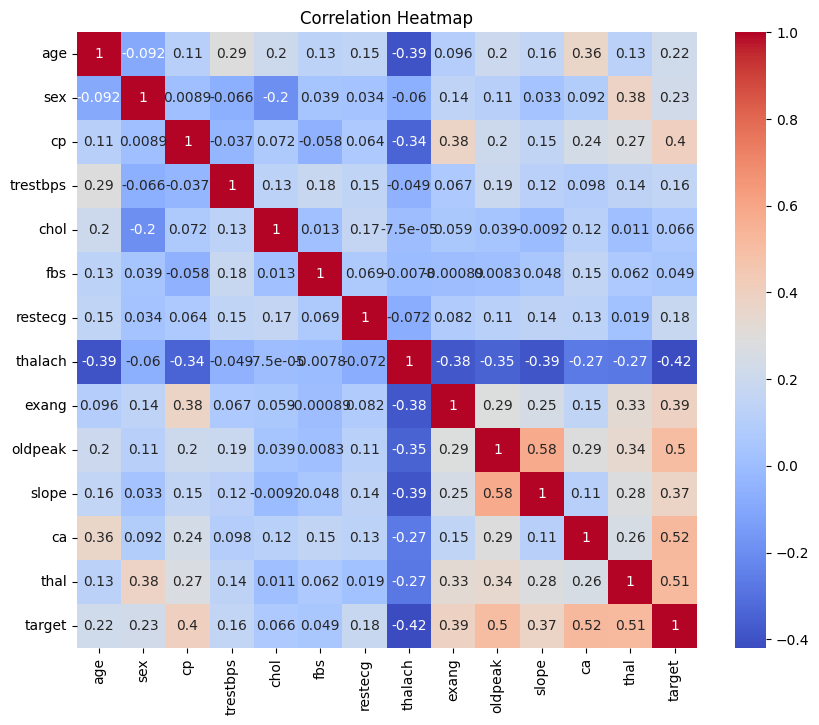

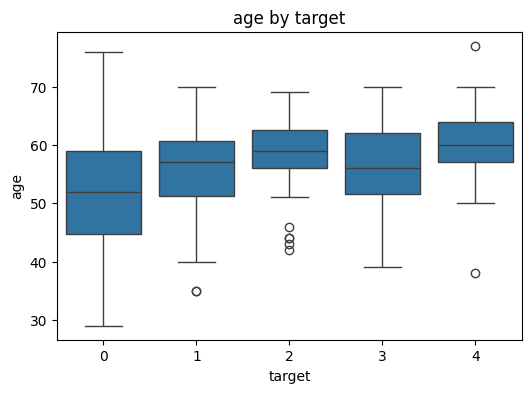

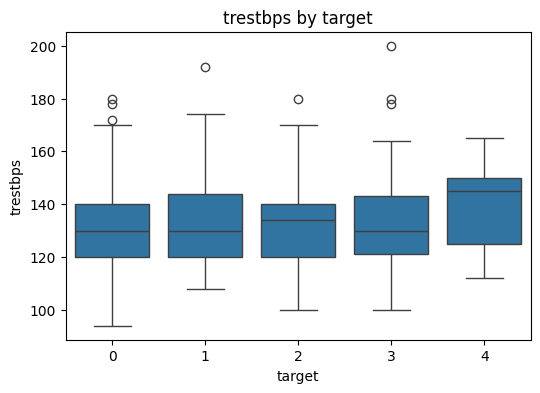

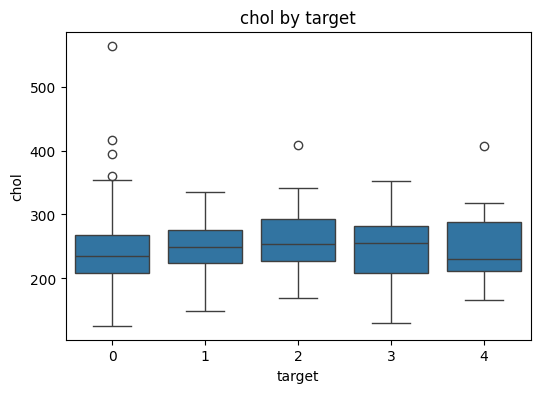

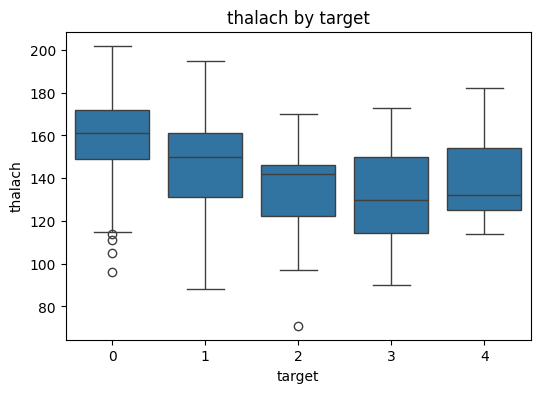

In [5]:
# Histograms
df[numeric_cols].hist(bins=20, figsize=(12,8))
plt.suptitle("Histograms of numeric features")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Boxplots by target for selected features
for col in ['age','trestbps','chol','thalach']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df['target'], y=df[col])
    plt.title(f"{col} by target")
    plt.show()
